In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 65 kB/s 
     |████████████████████████████████| 198 kB 44.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=c95ac2209b84075242e063bb8f459f8348810581efdbab1fae5faba3c8758478
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
!pip install wordcloud


# ****Task 1**** 

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from wordcloud import WordCloud,ImageColorGenerator
import re
import pyspark.sql.functions as f


sc = SparkContext.getOrCreate();
spark = SparkSession(sc)
words = sc.textFile('/content/nytimes_news_articles.txt').flatMap(lambda line: line.split(" ")).map(lambda word: (word,1)).reduceByKey(lambda a, b: a+b)
ps = words.map(lambda x: (x[1], x[0])).sortByKey(False).toDF()
new_names = ['keys', 'words']
dataset = ps.toDF(*new_names)
tokenizer = Tokenizer(inputCol= 'words', outputCol= 'Output')
tokenized = tokenizer.transform(dataset)
remover = StopWordsRemover(inputCol = 'Output', outputCol = 'filtered')
DF = remover.transform(tokenized)
filt = DF.select('keys', 'filtered')
from pyspark.sql import functions as F
filt2 = filt.withColumn("filtered", F.when((F.size(F.col("filtered")) == 0), F.lit(None)).otherwise(F.col("filtered")))
filt2 = filt2.dropna('any')
filt2.show(100)

+-----+------------+
| keys|    filtered|
+-----+------------+
|44350|       [mr.]|
|31339|      [said]|
|28501|         [—]|
|17789|          []|
|17426|     [said.]|
|14578|       [one]|
|12534|      [like]|
|12049|      [also]|
|10480|       [ms.]|
|10431|       [two]|
| 9752|    [people]|
| 9530|     [first]|
| 9455|      [last]|
| 8888|      [url:]|
| 8375|       [new]|
| 8253|       [new]|
| 7818|        [“i]|
| 7257|     [said,]|
| 6896|      [many]|
| 6201|      [even]|
| 6160|    [united]|
| 6100|      [“the]|
| 6085|      [time]|
| 6075|     [years]|
| 6043|      [made]|
| 5542|      [make]|
| 5467|       [get]|
| 5180|      [much]|
| 5168|     [trump]|
| 5080|   [percent]|
| 5005|     [three]|
| 4805| [including]|
| 4744|  [american]|
| 4732|     [going]|
| 4726|      [it’s]|
| 4697|      [back]|
| 4653|     [still]|
| 4529|      [york]|
| 4522|   [million]|
| 4385|     [think]|
| 4355|     [don’t]|
| 4343|       [may]|
| 4256|       [way]|
| 4243|     [since]|
| 4113|      

In [ ]:
cloud = filt2.select("filtered").rdd.flatMap(lambda x: x).collect()
cloud = str(cloud)
cleaned_data = re.sub('[^A-Za-z0-9 ]+', '', cloud)

str

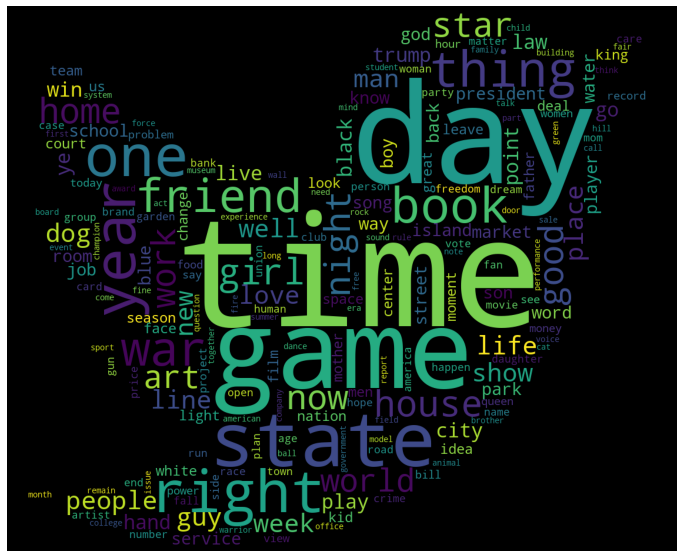

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import *

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# print(sentences[0])
#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cleaned_data)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()